In [67]:

import sys
import os
import requests
from pathlib import Path
import pandas as pd



root_dir = Path.cwd().parents[1]
conf_dir = os.path.join(root_dir,"config")


sys.path.append(str(conf_dir))

import config
import keys

extraction_keyword_list = config.AGSI_EXTRACTION_KEYWORD_LIST
metadata_keyword_list = config.AGSI_METADATA_KEYWORD_LIST
api_string = config.AGSI_API_STRING
sys.path.append(str(config.SRC_DIR))

import agsi_api as agsi


file_facility_queries = os.path.join(config.DATA_AGSI_DIR,"Query_listing.json")

data = pd.read_json(file_facility_queries)

In [68]:
index=12

In [69]:
timeseries_filename = "_".join([data["country"][index],data["company"][index],data["facility"][index]])+".json"

In [70]:
timeseries_path = config.DATA_AGSI_DIR

In [71]:
timeseries_file = os.path.join(timeseries_path, timeseries_filename)

In [72]:
timeseries_data = pd.read_json(timeseries_file)

In [91]:
timeseries_data

,gasDayStart,gasInStorage,injection,withdrawal,workingGasVolume,status,trend,full
0,2022-09-18,0.9949,9.6,0,0.999,C,0.96,99.59
1,2022-09-17,0.9853,10.56,0,0.999,C,1.06,99.59
2,2022-09-16,0.9747,0.33,0,0.999,C,0.03,99.59
3,2022-09-15,0.9744,0,0,0.999,C,-0,99.59
4,2022-09-14,0.9744,0,0,0.999,C,-0,99.59
...,...,...,...,...,...,...,...,...
4285,2011-01-24,-,-,-,NaN,N,-,99.59
4286,2011-01-23,-,-,-,NaN,N,-,99.59
4287,2011-01-22,-,-,-,NaN,N,-,99.59
4288,2011-01-21,-,-,-,NaN,N,-,99.59


In [98]:
timeseries_data.replace("-",np.nan).astype({"gasInStorage":float,"injection":float,"withdrawal":float,"workingGasVolume":float,"trend":float,"full":float})

SyntaxError: invalid syntax (2017778653.py, line 1)

In [86]:
timeseries_data["full"] = timeseries_data["full"].replace("-",np.nan)
timeseries_data["workingGasVolume"] = timeseries_data["workingGasVolume"].replace("-",np.nan)



In [87]:
import numpy as np

In [88]:
timeseries_data["full"] = timeseries_data["full"].astype(float)[0]

<AxesSubplot: xlabel='gasDayStart'>

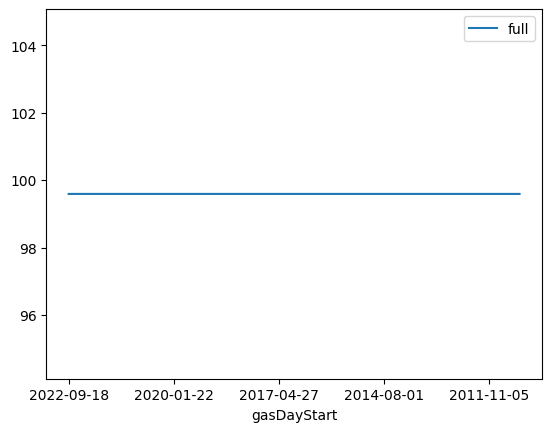

In [89]:
timeseries_data.plot(x="gasDayStart",y="full")